In [ ]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time

#download the treebank corpus from nltk
nltk.download('treebank')

#download the universal tagset from nltk
nltk.download('universal_tagset')

# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [ ]:
#print each word with its respective tag for first two sentences
for sent in nltk_data[:2]:
  for tuple in sent:
    print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')
('Mr.', 'NOUN')
('Vinken', 'NOUN')
('is', 'VERB')
('chairman', 'NOUN')
('of', 'ADP')
('Elsevier', 'NOUN')
('N.V.', 'NOUN')
(',', '.')
('the', 'DET')
('Dutch', 'NOUN')
('publishing', 'VERB')
('group', 'NOUN')
('.', '.')


In [ ]:
# split data into training and validation set in the ratio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)


In [ ]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [ ]:
# check some of the tagged words.
train_tagged_words[:5]

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

In [ ]:
#use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)

# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

12
{'DET', 'X', 'PRT', 'ADV', '.', 'ADJ', 'PRON', 'CONJ', 'ADP', 'NOUN', 'NUM', 'VERB'}


In [ ]:
# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)


    return (count_w_given_tag, count_tag)

In [ ]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)

tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)):
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

print(tags_matrix)

[[6.03708485e-03 4.51343954e-02 2.87480245e-04 1.20741697e-02
  1.73925534e-02 2.06410810e-01 3.30602261e-03 4.31220367e-04
  9.91806854e-03 6.35906279e-01 2.28546783e-02 4.02472317e-02]
 [5.68902567e-02 7.57255405e-02 1.85085520e-01 2.57543717e-02
  1.60868734e-01 1.76821072e-02 5.41995019e-02 1.03786280e-02
  1.42225638e-01 6.16951771e-02 3.07514891e-03 2.06419379e-01]
 [1.01369865e-01 1.21330721e-02 1.17416831e-03 9.39334650e-03
  4.50097844e-02 8.29745606e-02 1.76125243e-02 2.34833662e-03
  1.95694715e-02 2.50489235e-01 5.67514673e-02 4.01174158e-01]
 [7.13731572e-02 2.28859577e-02 1.47401085e-02 8.14584941e-02
  1.39255241e-01 1.30721495e-01 1.20248254e-02 6.98215654e-03
  1.19472459e-01 3.21955010e-02 2.98681147e-02 3.39022487e-01]
 [1.72191828e-01 2.56410260e-02 2.78940029e-03 5.25694676e-02
  9.23720598e-02 4.61323895e-02 6.87694475e-02 6.00793920e-02
  9.29084867e-02 2.18538776e-01 7.82104954e-02 8.96899477e-02]
 [5.24271838e-03 2.09708735e-02 1.14563107e-02 5.24271838e-03
  6

In [ ]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,DET,X,PRT,ADV,.,ADJ,PRON,CONJ,ADP,NOUN,NUM,VERB
DET,0.006037,0.045134,0.000287,0.012074,0.017393,0.206411,0.003306,0.000431,0.009918,0.635906,0.022855,0.040247
X,0.056890,0.075726,0.185086,0.025754,0.160869,0.017682,0.054200,0.010379,0.142226,0.061695,0.003075,0.206419
PRT,0.101370,0.012133,0.001174,0.009393,0.045010,0.082975,0.017613,0.002348,0.019569,0.250489,0.056751,0.401174
ADV,0.071373,0.022886,0.014740,0.081458,0.139255,0.130721,0.012025,0.006982,0.119472,0.032196,0.029868,0.339022
.,0.172192,0.025641,0.002789,0.052569,0.092372,0.046132,0.068769,0.060079,0.092908,0.218539,0.078210,0.089690
ADJ,0.005243,0.020971,0.011456,0.005243,0.066019,0.063301,0.000194,0.016893,0.080583,0.696893,0.021748,0.011456
PRON,0.009567,0.088383,0.014123,0.036902,0.041913,0.070615,0.006834,0.005011,0.022323,0.212756,0.006834,0.484738
CONJ,0.123491,0.009330,0.004391,0.057080,0.035126,0.113611,0.060373,0.000549,0.055982,0.349067,0.040615,0.150384
ADP,0.320931,0.034548,0.001266,0.014553,0.038724,0.107062,0.069603,0.001012,0.016958,0.323589,0.063275,0.008479
NOUN,0.013106,0.028825,0.043935,0.016895,0.240094,0.012584,0.004659,0.042454,0.176827,0.262344,0.009144,0.149134


### Example:

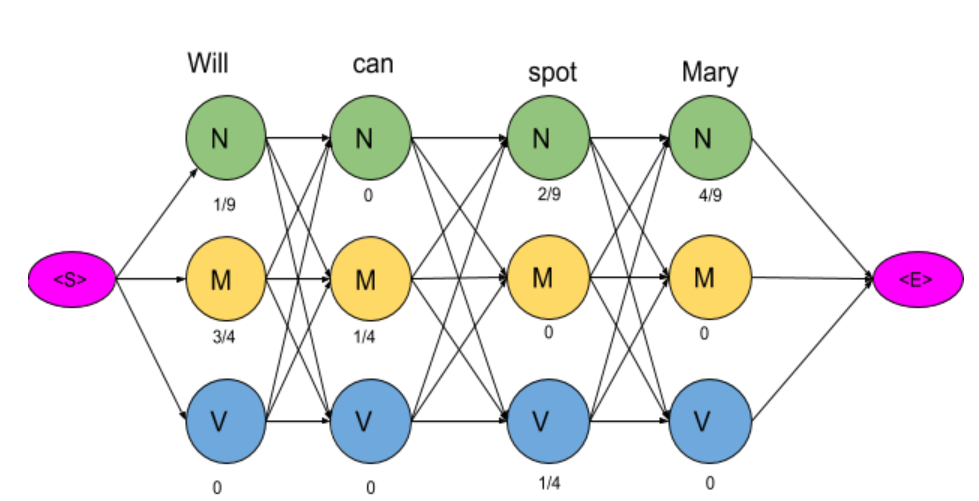

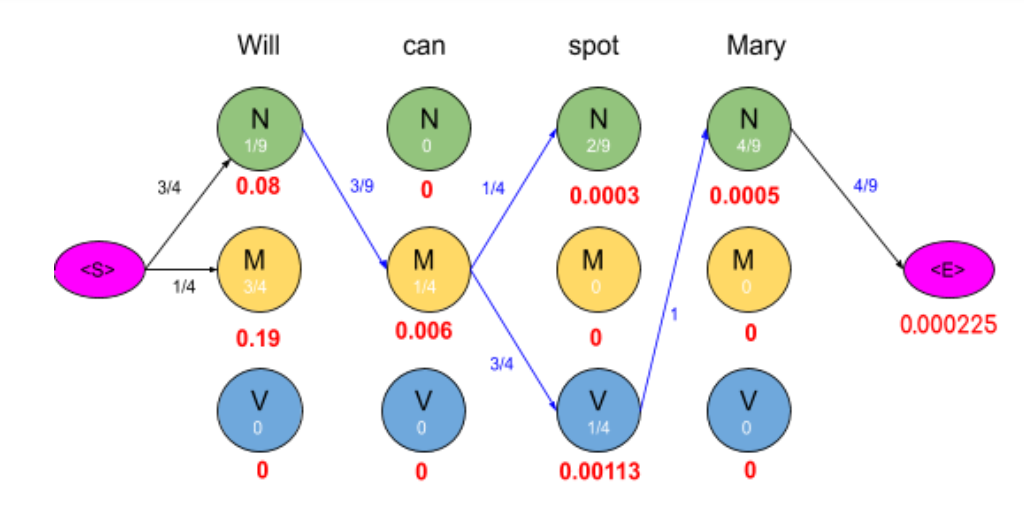

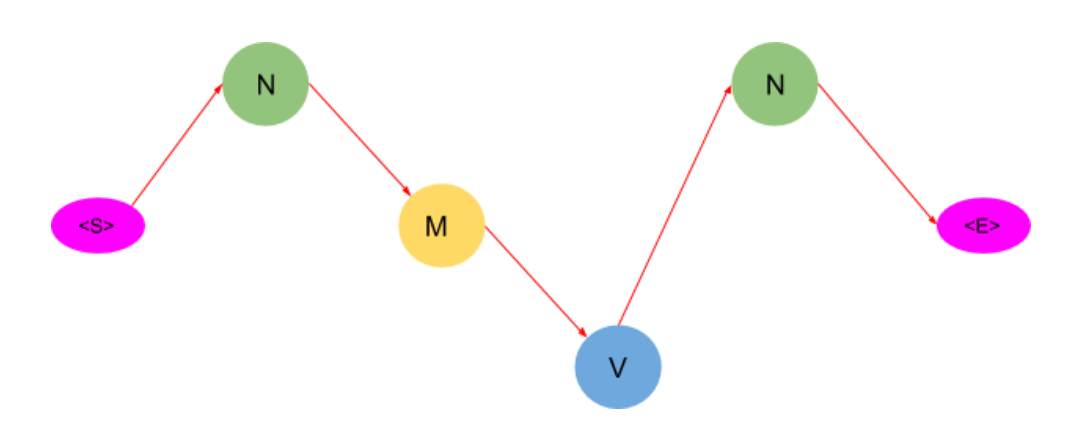

In [ ]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)      #define a random seed to get same sentences when run multiple times

# choose random 10 numbers
rndom = [random.randint(1,len(test_set)) for x in range(10)]

# list of 10 sents on which we test the model
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]


In [ ]:
#Here We will only test 10 sentences to check the accuracy
#as testing the whole training set takes huge amount of time
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  50.40041208267212
Viterbi Algorithm Accuracy:  93.77990430622009


In [ ]:
#Code to test all the test sentences
#(takes alot of time to run s0 we wont run it here)
# tagging the test sentences()
"""test_tagged_words = [tup for sent in test_set for tup in sent]
test_untagged_words = [tup[0] for sent in test_set for tup in sent]
test_untagged_words

start = time.time()
tagged_seq = Viterbi(test_untagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(test_tagged_words, test_untagged_words) if i == j]

accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)"""

In [ ]:
#To improve the performance,we specify a rule base tagger for unknown words
# specify patterns for tagging
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # verb
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')                   # nouns
]

# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [ ]:

#modified Viterbi to include rule based tagger in it
def Viterbi_rule_based(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]


        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]


        state.append(state_max)
    return list(zip(words, state))

In [ ]:
import time
#test accuracy on subset of test data
start = time.time()
tagged_seq = Viterbi_rule_based(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  43.693957805633545
Viterbi Algorithm Accuracy:  97.1291866028708


In [20]:
#Check how a sentence is tagged by the two POS taggers
#and compare them
test_sent="In 2005, Halton Borough Council put up a notice to tell the public about its plans to move a path from one place to another. Quite astonishingly, the notice was a 630 word sentence, which picked up one of our Golden Bull awards that year."
pred_tags_rule=Viterbi_rule_based(test_sent.split())
pred_tags_withoutRules= Viterbi(test_sent.split())
print(pred_tags_rule)
print(pred_tags_withoutRules)
#Will and Marry are tagged as NUM as they are unknown words for Viterbi Algorithm

[('In', 'ADP'), ('2005,', 'NOUN'), ('Halton', 'NOUN'), ('Borough', 'NOUN'), ('Council', 'NOUN'), ('put', 'VERB'), ('up', 'ADV'), ('a', 'DET'), ('notice', 'NOUN'), ('to', 'PRT'), ('tell', 'NOUN'), ('the', 'DET'), ('public', 'ADJ'), ('about', 'ADP'), ('its', 'PRON'), ('plans', 'VERB'), ('to', 'PRT'), ('move', 'VERB'), ('a', 'DET'), ('path', 'NOUN'), ('from', 'ADP'), ('one', 'NUM'), ('place', 'NOUN'), ('to', 'PRT'), ('another.', 'NOUN'), ('Quite', 'NOUN'), ('astonishingly,', 'NOUN'), ('the', 'DET'), ('notice', 'NOUN'), ('was', 'VERB'), ('a', 'DET'), ('630', 'NUM'), ('word', 'NOUN'), ('sentence,', 'NOUN'), ('which', 'DET'), ('picked', 'VERB'), ('up', 'ADV'), ('one', 'NUM'), ('of', 'ADP'), ('our', 'PRON'), ('Golden', 'NOUN'), ('Bull', 'NOUN'), ('awards', 'NOUN'), ('that', 'ADP'), ('year.', 'NOUN')]
[('In', 'ADP'), ('2005,', 'DET'), ('Halton', 'DET'), ('Borough', 'NOUN'), ('Council', 'NOUN'), ('put', 'VERB'), ('up', 'ADV'), ('a', 'DET'), ('notice', 'NOUN'), ('to', 'PRT'), ('tell', 'DET'), ('